# Multivariate Linear Regression

In [1]:
# Import libraries
get_ipython().magic('matplotlib inline')
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from numpy.linalg import inv
import itertools

In [2]:
# Read in data
datafile = '/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data

In [3]:
# Define X,Y Matrix
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
# Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

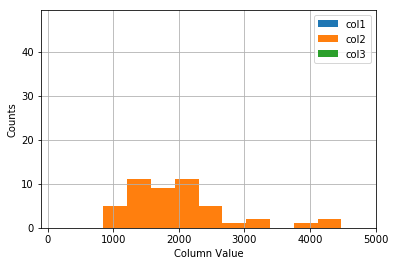

In [4]:
# Visualize data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

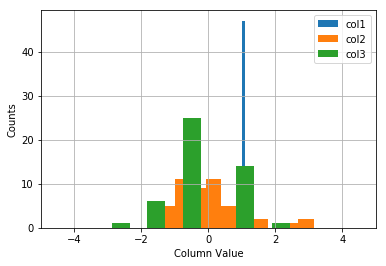

In [5]:
# Normalizing  columns (subtract mean, divide by standard deviation)
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    if not icol: continue
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

# Check for normalization
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [6]:
# Hypothesis function
def h(theta, X):
    return np.dot(X, theta)

# Cost function
def compute_cost(theta,X,y,m):
    return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

# Calculate costs
initial_theta = np.zeros((Xnorm.shape[1], 1))
m = y.size
compute_cost(initial_theta, Xnorm, y, m)

65591548106.45744

In [7]:
# Run gradient descent with multiple variables and plot convergence
def gradientDescentMulti(X, y, theta, alpha, num_iters,n):
    for i in range(num_iters):
        theta_new = theta
        for j in range(n):
            theta_new[j] = theta[j] - ((alpha / m) * np.sum((h(theta, X)-y) * X[:,j]))
        theta = theta_new
    return theta

gradientDescentMulti(Xnorm,y, initial_theta, 0.01, 400,3)

array([[  3.40412660e+05],
       [ -2.01110565e-11],
       [  1.28725623e-10]])

In [8]:
# Normal equation prediction
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

print("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print("$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46
